# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
%load_ext autoreload

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

To solve this issue, we are going to apply Deep Q-Network (DQN) algorithm. DQN is applicable because this task is an episodic one, the action space is descrete (4 possible actions) and the observation is in continuous space (an observed state vector has 37 dimensions). Based on the Q-Learning mini-project, the DQN algorithm is implemented in dqn_agent.py and the actual policy network is defined in model.py. The DQN algorithm (screenshot from the [original paper](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf)) is as following:

![DQN Algorithm](dqn_algorithm.png)

Episode 50  Average Score: 0.36  Average time: 0.69s   
Episode 100  Average Score: 1.04  Average time: 0.68s  
Episode 150  Average Score: 2.77  Average time: 0.66s  
Episode 200  Average Score: 4.73  Average time: 0.65s  
Episode 250  Average Score: 6.23  Average time: 0.69s  
Episode 300  Average Score: 7.88  Average time: 0.71s  
Episode 350  Average Score: 8.94  Average time: 0.78s  
Episode 400  Average Score: 9.98  Average time: 0.86s   
Episode 450  Average Score: 11.50  Average time: 0.89s  
Episode 500  Average Score: 12.47  Average time: 0.90s  
Episode 526  Average Score: 13.09  Average time: 0.85s  
Environment solved in 525 episodes!	Average Score: 13.09
Overall performance:


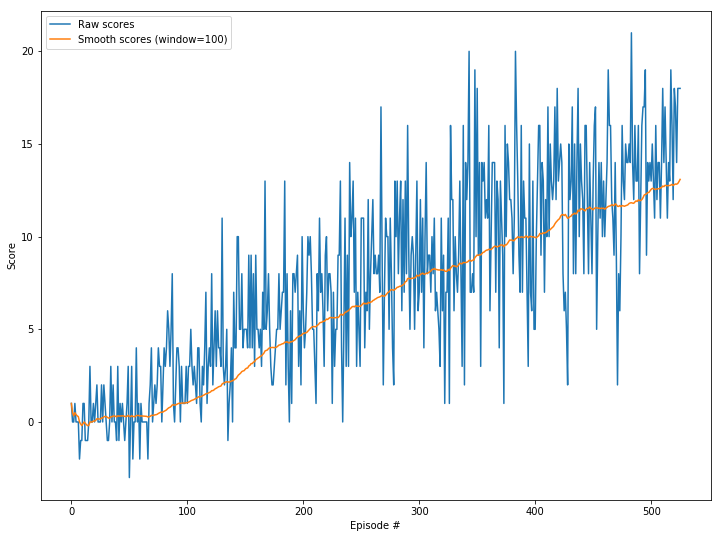

In [6]:
%autoreload 2
import time, random, torch
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

from dqn_agent import DQNAgent
%matplotlib inline

def plot_scores(raw_scores, smooth_scores, figsize=(6,4)):
    """
        Plots the raw_scores and smoothed scores in one single figure.
    """
    assert(len(raw_scores) == len(smooth_scores))
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(raw_scores)), raw_scores, label='Raw scores')
    plt.plot(np.arange(len(smooth_scores)), smooth_scores, label='Smooth scores (window=100)')
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.legend()
    plt.show()

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, target=13.0):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    raw_scores = []                    # list containing scores from each episode
    smooth_scores = []
    scores_window = deque(maxlen=100)  # last 100 scores
    time_window = deque(maxlen=100)     # last 100 episodes running time
    eps = eps_start                    # initialize epsilon
    agent = DQNAgent(state_size=37, action_size=4, seed=0)
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        begin = time.time()
        for t in range(max_t):
            # Cast int64 (generated by np.argmax) to int32 to avoid error:
            #   'numpy.int64' object has no attribute 'keys'
            # Reference: https://github.com/xkiwilabs/DQN-using-PyTorch-and-ML-Agents/issues/2
            action = agent.act(state, eps).astype(int)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        end = time.time()
        time_window.append(end - begin)   # save most recent running time
        scores_window.append(score)       # save most recent score
        raw_scores.append(score)          # save most recent score
        smooth_scores.append(np.mean(scores_window))
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}  Average Score: {:.2f}  Average time: {:.2f}s  '.format(
            i_episode, np.mean(scores_window), np.mean(time_window)),
            end="\n" if i_episode % 50 == 0 else "")
        if np.mean(scores_window) >= target:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(
                i_episode - 1, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return raw_scores, smooth_scores

raw_scores, smooth_scores = dqn(n_episodes=2000)

# plot the scores
print('Overall performance:')
plot_scores(raw_scores, smooth_scores, figsize=(12, 9))


## Model structure and hyper-params

In this implementation we use the standard Deep Q-Network (DQN). The policy model contains 2 hidden layers, each with 64 hidden layers and followed by ReLU activation (please refer to model.py).

The hyper-parameters are almost the same (if not identical) to the default hyper parameter provided in the Q Learning mini-project:

* Replay buffer size: 10^5. Considering there are 300 steps per episode, the buffer is large enough to store 333 most recent episodes.
* Batch size: 64
* Gamma ($\gamma$): 0.99
* Soft update: Tau ($\tau$): 0.001, update the target network every 4 episodes.
* Learning rate: 0.0005
* $\epsilon$-greedy: the $\epsilon$ starts from 1.0 and reduces 0.5% (i.e. multiplied by 0.995) every episode until reaching 0.01 (in approximately 919 episodes) and keeps fixed at 0.01 afterwards.

## Performance

This task is solved (>=13 average reward in 100-episode window) in 525 episodes. During the training process the average reward steadily goes up, indicating that the agent is learning well. Until the end of the training process the average reward doesn't seem to converge, there should be more room for the agent to perform even better. To try the performance, in the following training process, we will set an unchievable target reward to force the agent to finish all 2000 episodes. 

Episode 50  Average Score: 0.20  Average time: 0.65s   
Episode 100  Average Score: 0.83  Average time: 0.66s  
Episode 150  Average Score: 2.39  Average time: 0.67s  
Episode 200  Average Score: 4.22  Average time: 0.67s  
Episode 250  Average Score: 5.96  Average time: 0.69s  
Episode 300  Average Score: 7.22  Average time: 0.69s  
Episode 350  Average Score: 8.66  Average time: 0.68s  
Episode 400  Average Score: 10.70  Average time: 0.68s  
Episode 450  Average Score: 12.03  Average time: 0.69s  
Episode 500  Average Score: 13.13  Average time: 0.68s  
Episode 550  Average Score: 13.94  Average time: 0.72s  
Episode 600  Average Score: 13.76  Average time: 0.77s  
Episode 650  Average Score: 14.08  Average time: 0.75s  
Episode 700  Average Score: 14.59  Average time: 0.79s  
Episode 750  Average Score: 14.61  Average time: 0.84s  
Episode 800  Average Score: 14.99  Average time: 0.79s  
Episode 850  Average Score: 14.90  Average time: 0.67s  
Episode 900  Average Score: 15.27  Ave

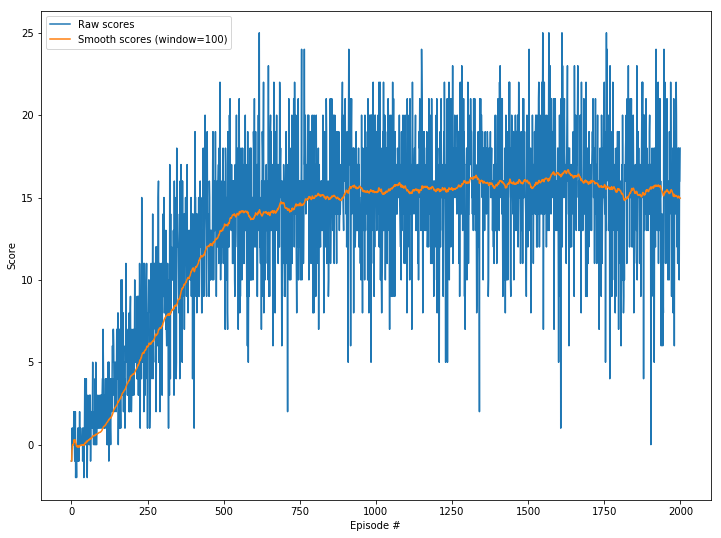

In [8]:
# Set an unachievable target to force the agent finish all 2000 episodes.
raw_scores, smooth_scores = dqn(n_episodes=2000, target=100.)

# plot the scores
print('Overall performance:')
plot_scores(raw_scores, smooth_scores, figsize=(12, 9))

From the training history we can find that the agent achieves relative stable performance after ~900 episodes, and then the average reward (within window of 100 episodes) flucturates between 15.0 and 16.5. I believe the final agent will outperform the checkpointed one (with average reward of slightly higher than 13.0) by a notable margin.

## Further improvements

The model doesn't appear to overfit (at least in first 2000 episodes), so potentially we can increase the parameter of the model to get better performance, by either adding more units to the existing 2 hidden layers, or adding one more hidden layer.